In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 40.6MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**First Let's unite RCB as it was BRC before**

In [10]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [11]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [12]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

**Let's go on now -**
**KXIP V RCB -  Q1**

In [13]:
data_f = data2.loc[data2.team1.isin(['Kings XI Punjab', 'Royal Challengers Bangalore'])] 
data_f = data_f.loc[data_f.team2.isin(['Kings XI Punjab', 'Royal Challengers Bangalore'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
83,84,2008,Bangalore,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove,NaN
93,94,2008,Chandigarh,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,I Shivram,NaN
126,127,2009,Durban,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead,BR Doctrove,TH Wijewardene,NaN
138,139,2009,Durban,2009-05-01,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi,NaN
180,181,2010,Bangalore,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper,NaN
204,205,2010,Chandigarh,2010-04-02,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,6,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",BF Bowden,M Erasmus,NaN
279,280,2011,Bangalore,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin,NaN
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN


Finally , We have got a complete dataset for all the matches of  KXIP VS RCB 

**Let's do Q1 now**

KXIP Wins - 12
RCB Wins - 12


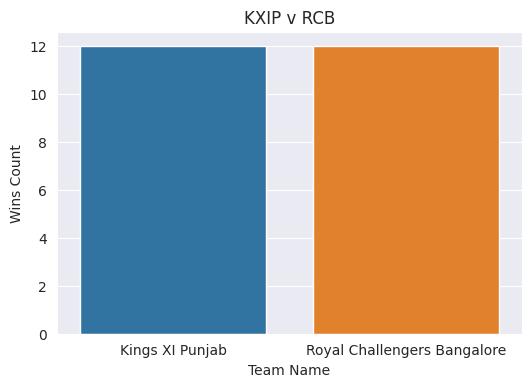

In [14]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KXIP v RCB')
A,B =data_f.winner.value_counts()

print('KXIP Wins -',A)
print('RCB Wins -',B)

plt.show()


It's a tough fight overall.

Let's find recent performance in last 3 seaons

In [15]:
data_g = data2.loc[data2.team1.isin(['Kings XI Punjab', 'Royal Challengers Bangalore'])] 
data_g = data_g.loc[data_g.team2.isin(['Kings XI Punjab', 'Royal Challengers Bangalore'])] 
data_g = data_g[data_g.season > 2016]
data_g

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
643,7901,2018,Bengaluru,13/04/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium,S Ravi,A.D Deshmukh,C Shamshuddin
683,7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,O Nandan
723,11319,2019,Mohali,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe,Nigel Llong
737,11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker


KXIP Wins - 2
RCB Wins - 4


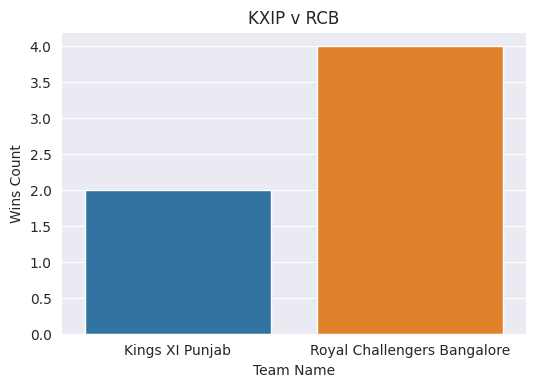

In [17]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_g)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KXIP v RCB')
A,B =data_g.winner.value_counts()

print('KXIP Wins -',B)
print('RCB Wins -',A)

plt.show()


Let's go with RCB now

**Let's do Q2 now**

**Finding av wicket lost in last 6 matches**

In [71]:
data_n = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_n = data_n.loc[data.batting_team.isin(['Kings XI Punjab'])]
data_n = data_n.loc[data.match_id.isin(['8','42','7901','7941','11319','11333'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [41]:
data_n.match_id.nunique() # verifying matches should be 6

6

In [42]:
data_n.player_dismissed.value_counts().sum() # Wickets lost by KXIP v RCB

40

In [43]:
np.round(40/6,2) # Average Wicket's loss of KXIP v RCB in last 6 matches


6.67

For Q2 let's mark 6-8 there.

**For Q3, Let's analyze ABD and Virat's Partnership v KXIP**

In [52]:
data_av = data.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_av = data_av.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_av = data_av.loc[data.non_striker.isin(['AB de Villiers','V Kohli'])]
data_av = data_av.loc[data.batsman.isin(['V Kohli','AB de Villiers'])]

data_av


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
66278,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,5,AB de Villiers,V Kohli,PP Chawla,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
66279,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,PP Chawla,0,0,0,0,0,0,0,0,0,V Kohli,bowled,NaN
82571,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,3,AB de Villiers,V Kohli,Azhar Mahmood,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
82572,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,4,AB de Villiers,V Kohli,Azhar Mahmood,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
82573,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,5,AB de Villiers,V Kohli,Azhar Mahmood,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171525,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,5,AB de Villiers,V Kohli,M Ashwin,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
171526,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,M Ashwin,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
171527,11319,2,Royal Challengers Bangalore,Kings XI Punjab,16,1,V Kohli,AB de Villiers,Mohammed Shami,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
171528,11319,2,Royal Challengers Bangalore,Kings XI Punjab,16,2,AB de Villiers,V Kohli,Mohammed Shami,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [54]:
data_av.player_dismissed.value_counts() # Finding how many times who has been dismissed 

V Kohli           5
AB de Villiers    2
Name: player_dismissed, dtype: int64

In [55]:
data_av.total_runs.sum() # There total runs

120

In [56]:
data_av.match_id.nunique() # Together Matches

7

In [57]:
np.round(120/7,2) # Average partnership runs v KXIP

17.14

That isn't a great partnership by ABD and VK v KXIP.

Let's mark 16-25

**Let's do Q4**

**For this let's choose only Bengaluru stadium as it synchronizes a bit with Sharjah and let's find average six hit there**

In [59]:
data_s = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore','Kings XI Punjab'])]
data_s = data_s.loc[data.batting_team.isin(['Kings XI Punjab','Royal Challengers Bangalore'])]
data_s = data_s.loc[data.match_id.isin(['42','7901','11333'])]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
9710,42,1,Kings XI Punjab,Royal Challengers Bangalore,1,1,HM Amla,MJ Guptill,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
9711,42,1,Kings XI Punjab,Royal Challengers Bangalore,1,2,MJ Guptill,HM Amla,A Choudhary,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
9712,42,1,Kings XI Punjab,Royal Challengers Bangalore,1,3,MJ Guptill,HM Amla,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
9713,42,1,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,MJ Guptill,A Choudhary,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
9714,42,1,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,MJ Guptill,A Choudhary,0,0,0,0,0,0,0,0,0,HM Amla,caught,KM Jadhav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [64]:
data_s.total_runs.value_counts() # Finding stats for boundary

1    280
0    258
4     86
2     63
6     38
3      2
Name: total_runs, dtype: int64

In [65]:
data_s.match_id.nunique()

3

In [67]:
np.round(38/3,2)  # Let's find average six in last 3 matches on Bengaluru

12.67

Let's mark 11-14

**Let's do Q5 now**

**Let's find average no ball runs in RCB v KXIP**

In [74]:
data_b = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore','Kings XI Punjab'])]
data_b = data_b.loc[data.batting_team.isin(['Kings XI Punjab','Royal Challengers Bangalore'])]
data_b

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [75]:
data_b.noball_runs.sum()

29

In [76]:
np.round(29/24,2) # Average No ball runs

1.21

Let's mark 1-2

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

